<a href="https://colab.research.google.com/github/hmarathe420/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe



# **Project Summary -**

• In the Rossmann sales prediction project there is a dataset which contains sales information.

• The shape of Rossmann dataset = 1017209, 9 and Store dataset = 1115, 10.

• In both dataset ‘Store’ column is common. So we do inner join on the basis of column ‘Store’.

• This dataset is a live dataset of Rossmann Stores. On analyzing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem.

In this Notebook we are going to work on following topics:-

Analyzing the dataset by using Exploratory Data Analysis using exponential moving averages analysis trends and seasonality in Rossmann dataset Analyze Regression using following prediction analysis.

A) Linear Regression Analysis.

B)Elastic Regression (Lasso & Ridge Regression).

C) Decision tree.

D) Random Forest Regression.

# **GitHub Link -**

GitHub Link -->  [Tap here](https://github.com/hmarathe420/Retail_Sales_Prediction)

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

**You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [548]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor




### Dataset Loading

In [415]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [416]:
#loading both dataset in csv formate from google drive.
rossmann_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Rossmann Stores Data.csv")
store_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/store.csv")

### Dataset First View

In [417]:
# Dataset First Look of rossmann store data
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [418]:
# Dataset First Look of store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


**As we Know that we have two dataset rossmann store data and store data. Both the dataset have a common colum "Store". so using "Store" column we can merge these dataset and make it single containing all the features.**

In [419]:
#Merging both datasets using pd.merge and storing into new variable called rossmannstore_df
rossmannstore_df = pd.merge(rossmann_df,store_df, on ='Store', how = 'left')

In [420]:
# First Five Rows of rossmannstore_df (merged) dataset
rossmannstore_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [421]:
# Dataset Rows & Columns count
print("Rossmann_df Dataset Rows & columns")
rossmann_df.shape

Rossmann_df Dataset Rows & columns


(1017209, 9)

In [422]:
# Rows & columns count of store_df
print("Store_df Datasets Rows & Columns")
store_df.shape

Store_df Datasets Rows & Columns


(1115, 10)

In [423]:
# Merged Dataset (Rossmannstore_df) Rows & columns count
print("Rossmannstore_df Rows & columns count")
rossmannstore_df.shape

Rossmannstore_df Rows & columns count


(1017209, 18)

**After Merging both dataset we have created new dataset which is Rossmannstore_df. And from the above information we can say that the merged dataset have 1017209 Rows and 18 Columns.**

### Dataset Information

In [424]:
# Dataset Info
rossmannstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

**From the above information we can say that the rossmannstore_df contains 18 columns with different datatypes, among them some columns has int64 datatype values and some are object and float64. also there are duplicate values.**

#### Duplicate Values

In [425]:
# Dataset Duplicate Value Count
rossmannstore_df.duplicated().sum()

0

**There are no duplicate values in rossmannstore dataset.**

#### Missing Values/Null Values

In [426]:
# Missing Values/Null Values Count
rossmannstore_df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

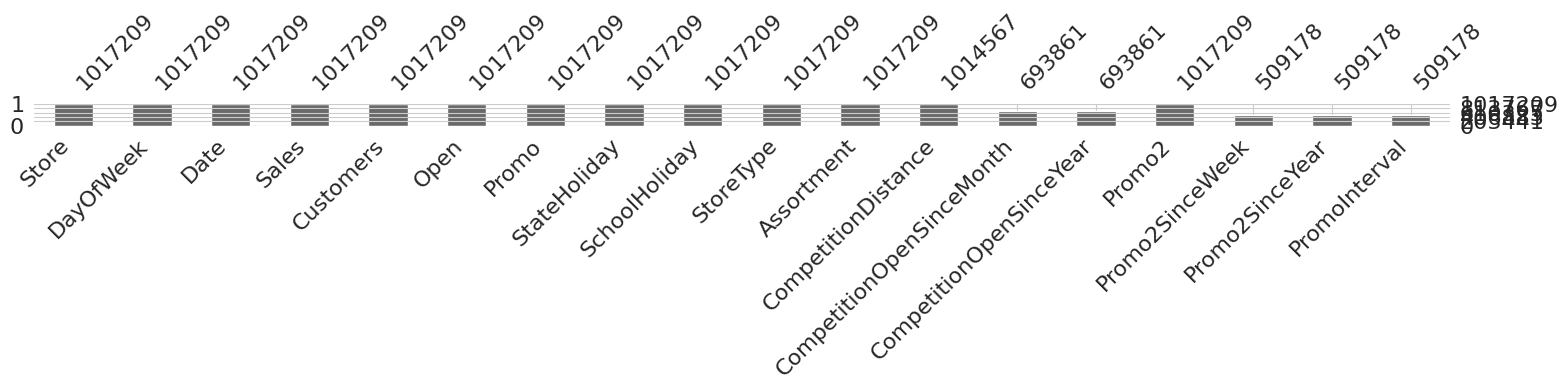

In [427]:
# Visualizing the missing values
msno.bar(rossmannstore_df, figsize=(16,4))
plt.show()

### What did you know about your dataset?

**From the above bar graph we get to know that the below listed colums has the null values:**

**CompetitionDistance            
CompetitionOpenSinceMonth   
CompetitionOpenSinceYear                             
Promo2SinceWeek              
Promo2SinceYear             
PromoInterval.**

## ***2. Understanding Your Variables***

In [428]:
# Dataset Columns
columns = list(rossmannstore_df.columns)
columns

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [429]:
# Dataset Describe
rossmannstore_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


### Variables Description

**Data fields**

**Most of the fields are self-explanatory. The following are descriptions for those that aren't.**



*   Id - an Id that represents a (Store, Date) duple within the test set
*   Store - a unique Id for each store

*   Sales - the turnover for any given day (this is what you are predicting)
*   Customers - the number of customers on a given day

*   Open - an indicator for whether the store was open: 0 = closed, 1 = open
*   StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

*   SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
*   StoreType - differentiates between 4 different store models: a, b, c, d


*   Assortment - describes an assortment level: a = basic, b = extra, c = extended
*   CompetitionDistance - distance in meters to the nearest competitor store

*   CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
*   Promo - indicates whether a store is running a promo on that day


*   Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
*   Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

*   PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store



















### Check Unique Values for each variable.

In [430]:
# Check Unique Values for each variable.
rossmannstore_df.nunique()

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     5
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [431]:
# Write your code to make your dataset analysis ready.
rossmannstore_df['year'] = rossmannstore_df['Date'].apply(lambda x: x.split('-')[0])
rossmannstore_df['month'] = rossmannstore_df['Date'].apply(lambda x: x.split('-')[1])
rossmannstore_df['date'] = rossmannstore_df['Date'].apply(lambda x: x.split('-')[2])

**We have successfully added the three new columns in dataset which are year, month and date using Date column. So now we can delete the Date Column becouse we don't need it anymore.**

In [432]:
#deleting the Date Column from the dataset.
rossmannstore_df = rossmannstore_df.drop(['Date'], axis = 1)

*we have deleted the Date column from the dataset. for confirmation we can check in the below list there is no Date column present anymore.*

In [433]:
list(rossmannstore_df.columns)

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'year',
 'month',
 'date']

**Bellow you can see that there is multiple datatypes in stateholiday column we called it as mixed datatype error. while loading the dataset above we got this error. By Replacing int(0) into str(0) we can resolve this error. This will be helpfull us for the further analysis like when we will do the distribution of sales over the StateHoliday.**

In [434]:
#Unique Values in StateHoliday Column
rossmannstore_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [435]:
#Replacing int(0) with str(0) using Replace function
rossmannstore_df['StateHoliday'] = rossmann_df['StateHoliday'].replace([0],'0')

In [436]:
#Checking whether the int(0) replace with str(0) or not
rossmannstore_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

**Now you can see above there is only string value present in StateHoliday Column. It means we have Successfuly converted int(0) with str(0).**

### What all manipulations have you done and insights you found?

We had Date column from that column or date i have seperated the year, month and date so i can delete that column. after accessing the year month and date from the Date column i have deleted the Date Column. after that i check out all the column names for my confirmation whether the colum Date is successfully deleted or not.

So Basically i have done the manupulation on the Date column and i got seprated year, month and date as a insights we can say.



I have also Replaced the int(0) with str(o) in StateHoliday Columns for further analysis. It will be helpfull for me when i will do the saled distribution over the StateHoliday.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Explolatory Data Analysis**

#### Chart - 1

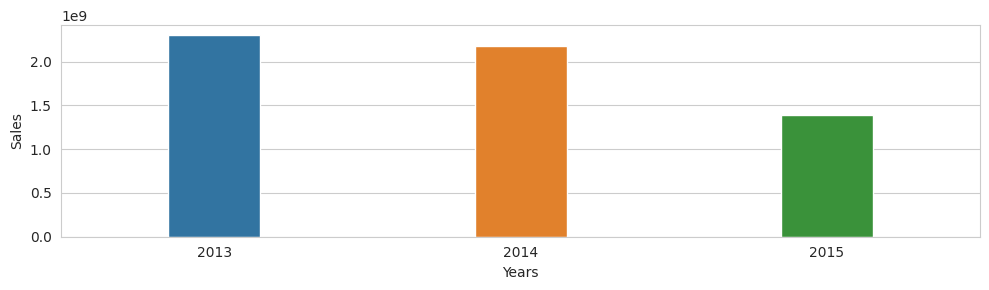

In [437]:
# Sales Distribution Over the years.
unique_year_list = sorted(list(rossmannstore_df['year'].unique()))

yearly_sales = list(rossmannstore_df[['Sales','year']].groupby('year')['Sales'].sum())

plt.figure(figsize= (10,3))
plt.xlabel('Years')
plt.ylabel('Sales')
sns.barplot(x = unique_year_list,y = yearly_sales, width= 0.3)
plt.show()

##### 1. Why did you pick the specific chart?

Becouse i wanted to distrubute the sales over the years. And we know that for visualisation of distrubution barplot is always better to use. That's the reason why i pick this specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above barplot i found the insights that are given below:

from the above chart we can say that in year 2013 the sales is high and in year 2015 the sales is very low. and similarly in year 2014 the sales in also high we can say.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, above insights can help to creat positive business impact becouse from the above insights we got that in year 2013 the sales was high. if they do the same harwork and work management as they done in year 2013 then they can easily bring the possitive bussiness impact.

From the above chart we can say that there is negative growth in sales. becouse we can see that in year 2015 there is very less sales unlike 2013. In year 2013 and 2014 we can see that there is high sales.

From year 2015 sales we can say that there is negative growth in sales. there can be multible reasons behind it like no follow up and poor hiring.

#### Chart - 2

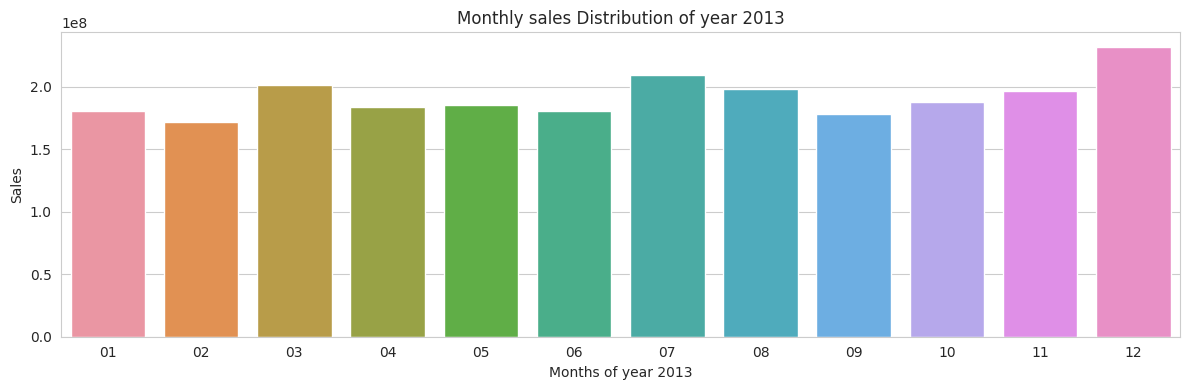

In [438]:
# Monthly Sales Distribution of year 2013

df_2013 = rossmannstore_df[rossmannstore_df['year']=='2013']

month_list_2013 = sorted(list(df_2013['month'].unique()))
monthly_sales_2013 = list(df_2013[['Sales','month']].groupby('month')['Sales'].sum())

plt.figure(figsize=(12,4))
plt.title('Monthly sales Distribution of year 2013')
plt.xlabel('Months of year 2013')
plt.ylabel('Sales')
sns.barplot(x =month_list_2013, y = monthly_sales_2013)
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to distribute the sales over the months of year 2013 and for that distribution i have use this specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we got the insights like in which month of  year 2013 how much sales is happened. Like in month 12 there is high sales as compaire to other months. and in month 2 there is very less sales as compare to other months. This kind of insights i got from the above chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I don't think that there is any negative growth insights i got from the above chart but i can only say that in month 2 there is less sales as compare to othere months. so this can be bring negative growth in sales.

For less sale in month 2 there may be same reasons as we discuss above.

#### Chart - 3

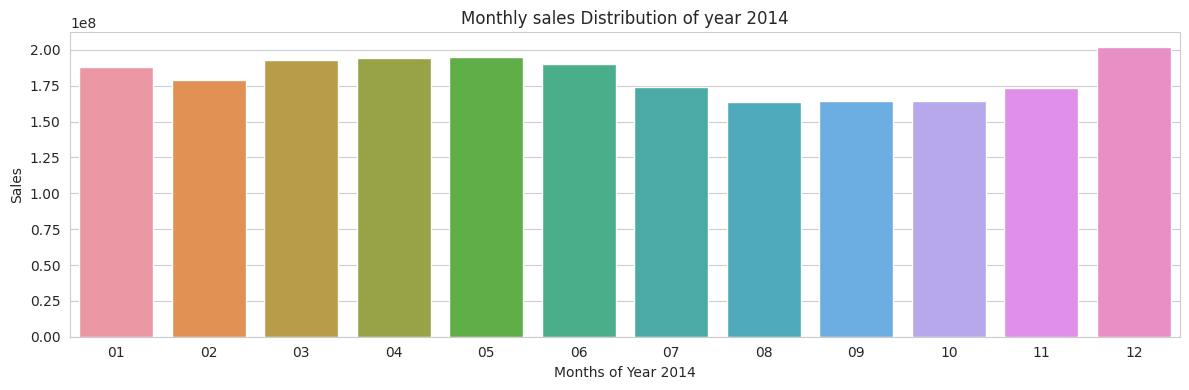

In [439]:
# Sales Distribution over the months of year 2014.
df_2014 = rossmannstore_df[rossmannstore_df['year']=='2014']

month_list_2014 = sorted(list(df_2014['month'].unique()))
monthly_sales_2014 = list(df_2014[['Sales','month']].groupby('month')['Sales'].sum())

plt.figure(figsize=(12,4))
plt.title('Monthly sales Distribution of year 2014')
plt.xlabel('Months of Year 2014')
plt.ylabel('Sales')
sns.barplot(x =month_list_2014, y = monthly_sales_2014)
plt.show()

##### 1. Why did you pick the specific chart?

For Monthly Distribution of sales of year 2014 i have used this specific chart. use of barplat for distribution is always good and it's really easy to understand. This is the reason why i use this specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we got the several insights like in which month how much sales is happened. like in month 12  sales is high and in month 8 there is less sales. This kind of insights i got from the above chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, the above chart will help to creating positive impact becouse from the above chart we got that in which month the sales was high. whatever the work they have done in the month which have high by doing the same work and management they can achieve high sales in other months also and  i hope defienetly this can bring positive business impact. i can only say that in month 8 there is less sales this can bring negative growth in sales. There can be multiple reason behind it like ignoring your competitors and poor marketing.

#### Chart - 4

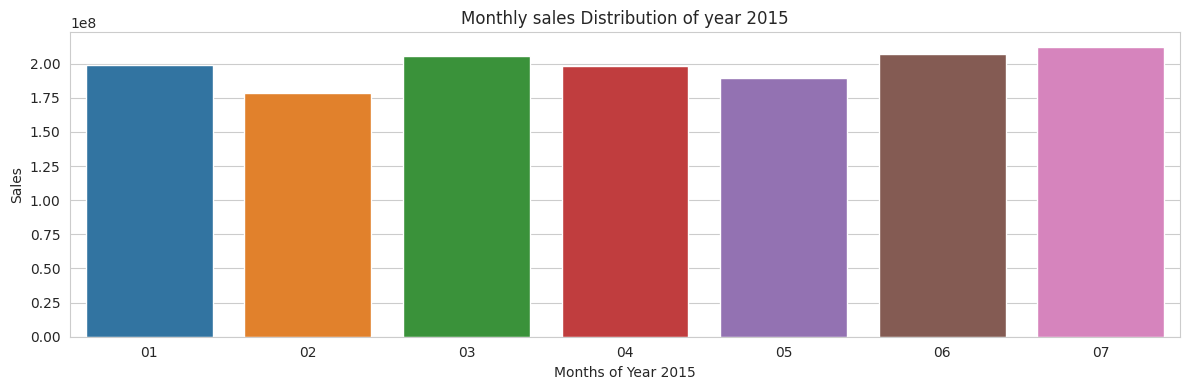

In [440]:
# Monthly sales distribution over the months of year 2015
df_2015 = rossmannstore_df[rossmannstore_df['year']=='2015']

month_list_2015 = sorted(list(df_2015['month'].unique()))
monthly_sales_2015 = list(df_2015[['Sales','month']].groupby('month')['Sales'].sum())

plt.figure(figsize=(12,4))
plt.title('Monthly sales Distribution of year 2015')
plt.xlabel('Months of Year 2015')
plt.ylabel('Sales')
sns.barplot(x =month_list_2015, y = monthly_sales_2015)
plt.show()

##### 1. Why did you pick the specific chart?

For monthly sales distribution of year 2015 i have used this specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above i got the insights like in which month sales was high and low in year 2015. like in month 7 the sales is high and in month 2 the sales is less. like this insight i got from the above chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

i thik yes above gained insights can help creating a positive impact becouse from the above insight we get to know that there is very less sales in month 2 of year 2015. so by avoiding the mistakes that they have done in month 2 they can bring the positive impact on bussiness.


according to me in month 2 of year 2015 there is negative growth in sales. becouse having less sales in month can bring negative growth in bussiness.

They have to avoid the mistakes which they have done in month 2 of year 2015. so this can be helfull for increasing sales as well bring the possitive bussiness impact.

#### Chart - 5

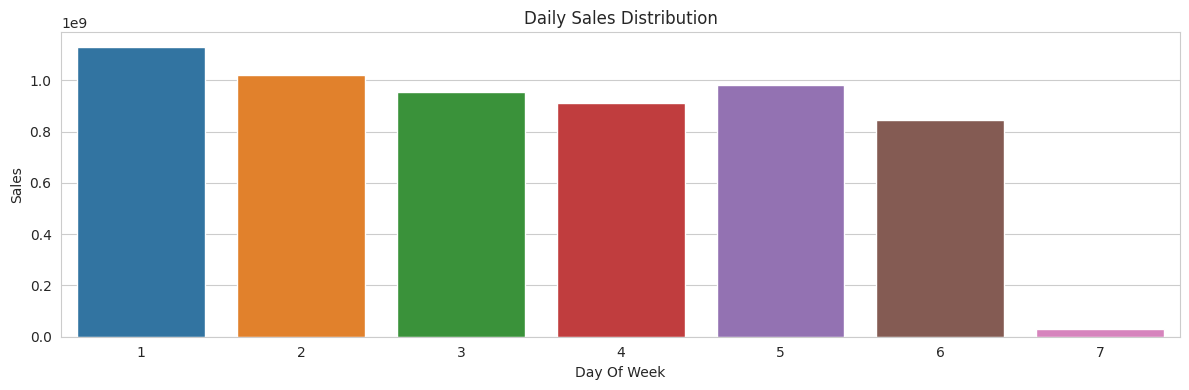

In [441]:
# sales Distribution over the day of week.

dayofweek_list = sorted(list(rossmannstore_df['DayOfWeek'].unique()))

daily_sales = list(rossmannstore_df[['Sales','DayOfWeek']].groupby('DayOfWeek')['Sales'].sum())

plt.figure(figsize = (12,4))
plt.title("Daily Sales Distribution")
plt.xlabel('Day Of Week')
plt.ylabel("Sales")
sns.barplot(x = dayofweek_list , y = daily_sales )
plt.show()

##### 1. Why did you pick the specific chart?

I have pick that chart becouse i wanted to show the daily sales distribution graphicaly.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we got most important insights  that are on the monday the sales is high and on the other hand the sales is too less on the sunday.

The sales is less on the sunday this can be because of holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes definitely, The gained insight help creating a positive bussiness impacet. The gained insights are the sales is high on monday and sales in less on sunday. so using this important insight this can be bring positive bussiness impacat. Because from the gained insight we get to know that on the sunday the sell is less. and the reason behind is may be holiday. by finding out the reasons and based on some changes this insight can bring the positive impact on the bussiness.


I can say that the sales is less on the sunday this can be lead to negatie growth. and the reason for that is there may be the holiday on the sunday.

#### Chart - 6

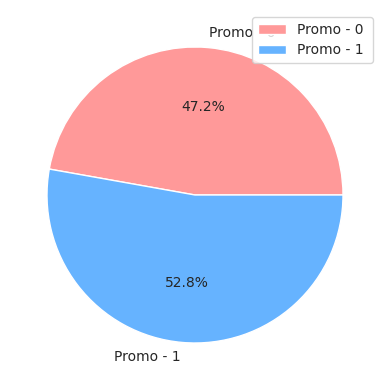

In [442]:
# Comparing Sales over the promos
promo_list = sorted(list(rossmannstore_df['Promo'].unique()))
promo_sales = list(rossmannstore_df[['Promo','Sales']].groupby('Promo')['Sales'].sum())

plt.figure(figsize =(12,4))
plt.pie(promo_sales, labels=('Promo - 0 ', 'Promo - 1'), colors= ('#ff9999','#66b3ff'), autopct='%1.1f%%')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the Pie chart because i have to compare sales over the promo.

##### 2. What is/are the insight(s) found from the chart?

I found insights from the above pie chart that are given bellow:

The sales is high when the promo is active.

The sales is low when the promo is not there.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes we gained insight that help creating a positive bussines impact. The gained insight is that with the promo the sales is high. so from my side it is suggested that apply promo for increasing the sales and for positive business impact.


I can say that by not using the promo the sales can be less and this can be the reason for negative growth.

#### Chart - 7

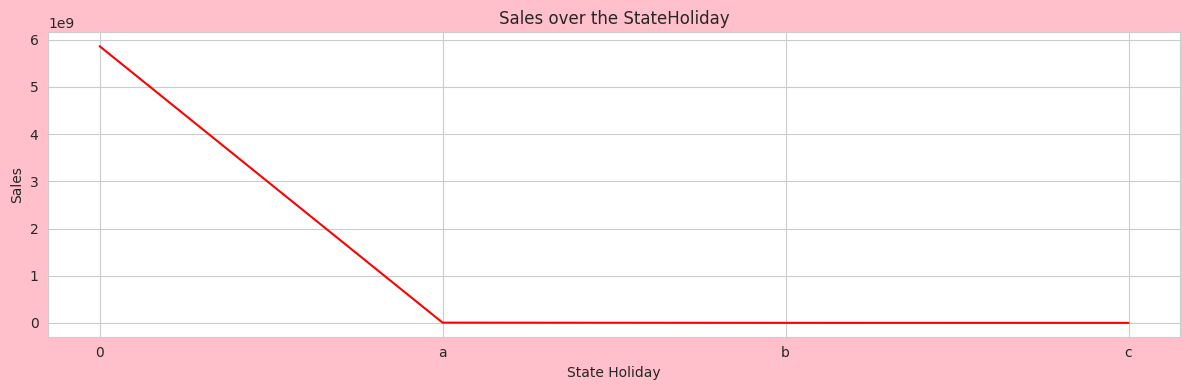

In [443]:
# Sales over the StateHoliday

stateholiday_list = list(rossmannstore_df['StateHoliday'].unique())

sales_for_stateHoliday =  list(rossmannstore_df[['Sales','StateHoliday']].groupby('StateHoliday')['Sales'].sum())

plt.figure(figsize= (12,4), facecolor = 'pink')
plt.title('Sales over the StateHoliday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
sns.lineplot(x = stateholiday_list , y =sales_for_stateHoliday , color = 'red')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I have selected lineplot because i wanted to check that how the sales happen over the stateholiday.

##### 2. What is/are the insight(s) found from the chart?

From the above Lineplot i got the insights like when there is no state holiday at that day the sales is high. but when there is state holiday there is less sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes the gained insight give understanding to bussiness that how the sales happens during the state holiday.

#### Chart - 8

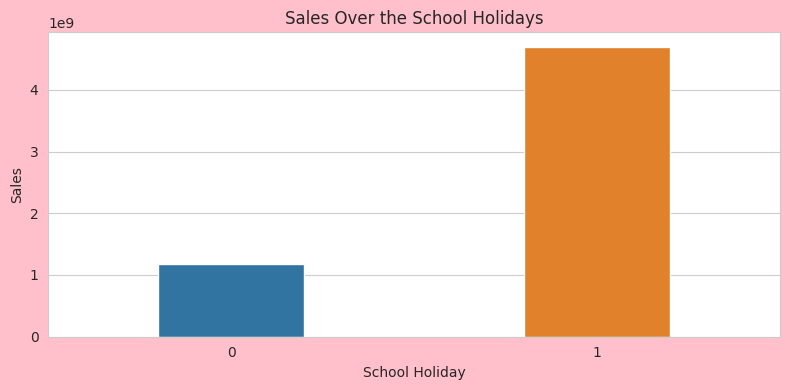

In [444]:
# sales Distribution over the school Holiday

school_holiday_list = list(rossmannstore_df['SchoolHoliday'].unique())

sales_over_school_holiday = list(rossmannstore_df[['Sales','SchoolHoliday']].groupby('SchoolHoliday')['Sales'].sum())

plt.figure(figsize = (8,4), facecolor = 'pink')
plt.title('Sales Over the School Holidays')
plt.xlabel('School Holiday')
plt.ylabel('Sales')
sns.barplot(x = school_holiday_list, y = sales_over_school_holiday, width= 0.4)
plt.show()



##### 1. Why did you pick the specific chart?

I wanted to distribute the sales over the school Holiday that's why i have picked the above barchart.

##### 2. What is/are the insight(s) found from the chart?

From the above Barchart i found the insight that the sales is high when there is school holidays and the sales is very less when there is no school holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes the gained insight can be helful to creat positive bussiness impact. Because from the above barchart we get to know that there is high sales during the school holidays and less sales when there is no school holidays.  By using this insight we can create positive bussiness impact. If the company or bussinessmann focus on the sales during the school holidays then there is high chances for high sales.

The sales are less when there is no school holiday and it seems that this may be leed to negative growth of bussiness. The reason behind it when there is no shcool holiday it means all the students are in the school this can be the reason behind the less sales.

#### Chart - 9

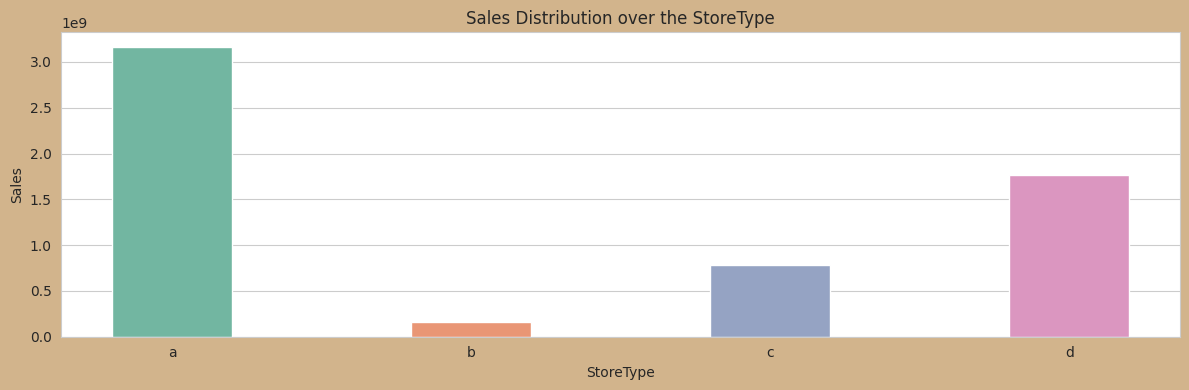

In [445]:
# Sales Distribution over the StoreType

storetype_list = sorted(list(rossmannstore_df['StoreType'].unique()))

storetype_sales = list(rossmannstore_df[['Sales','StoreType']].groupby('StoreType')['Sales'].sum())

plt.figure(figsize = (12,4), facecolor='tan')
plt.title('Sales Distribution over the StoreType')
plt.xlabel('StoreType')
plt.ylabel('Sales')
sns.barplot(x = storetype_list, y = storetype_sales, width = 0.4, palette= 'Set2')
plt.plot()
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to distribute the sales over the store type that's why i have picked the barplot.

##### 2. What is/are the insight(s) found from the chart?

From the above Barplot i found the insights that are the sales is high in 'a' storetype and the sales is very low in 'b' storetype.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above bar chart i can say that the 'b' store type lead to negative growth in bussiness and unlike 'b' storetype the storetype 'a' lead  to positive growth of the business.

The gained insight are the sales is high in store type 'a' and the sales is low in storetype 'b' so from my side the company or bussinessman should focus on storetype 'b' and increase the sales of it.

#### Chart - 10

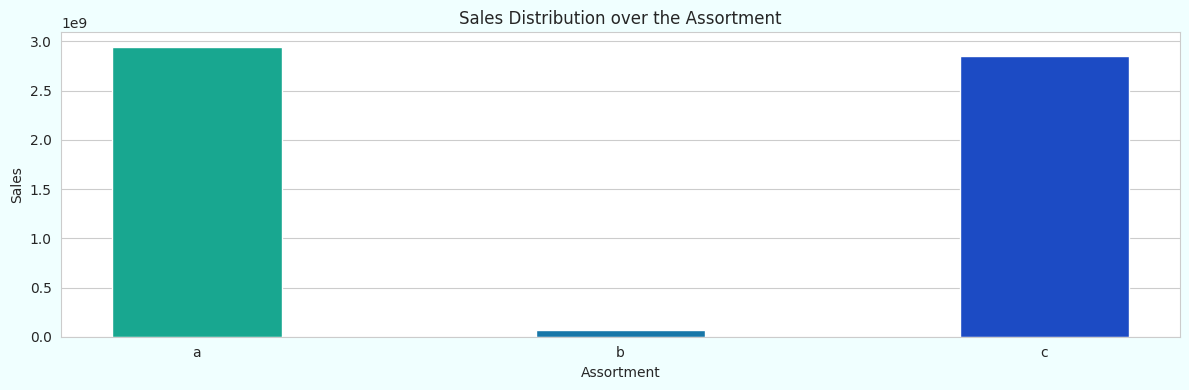

In [446]:
# Sales Distribution over the Assortment

Assortment_list = sorted(list(rossmannstore_df['Assortment'].unique()))

Assortment_sales = list(rossmannstore_df[['Sales','Assortment']].groupby('Assortment')['Sales'].sum())

plt.figure(figsize = (12,4), facecolor = 'azure')
plt.title('Sales Distribution over the Assortment')
plt.xlabel('Assortment')
plt.ylabel('Sales')
sns.barplot(x = Assortment_list, y = Assortment_sales, width = 0.4, palette= 'winter_r')
plt.plot()
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to do the Sales distribution over the assortment that's why i pick this specific chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart i can say that the Assortment A and C has high sales and the Assortment B has very less sale. This kind of insights i found from the above chart.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I think yes the gained insight can help to create positive bussiness impact. Because from the above chart we get to know that in whih Assortment the sales is high and less. based on this insights companies can do some changes in CRM and by focusing on the weeknesses they can bring possitive impact on the business.

The AssortMent B lead to negative Growth in business. Because there is very less sales. There can me many reasons behind it. among them it may be the poor hiring and not having the proper management.

#### Chart - 11

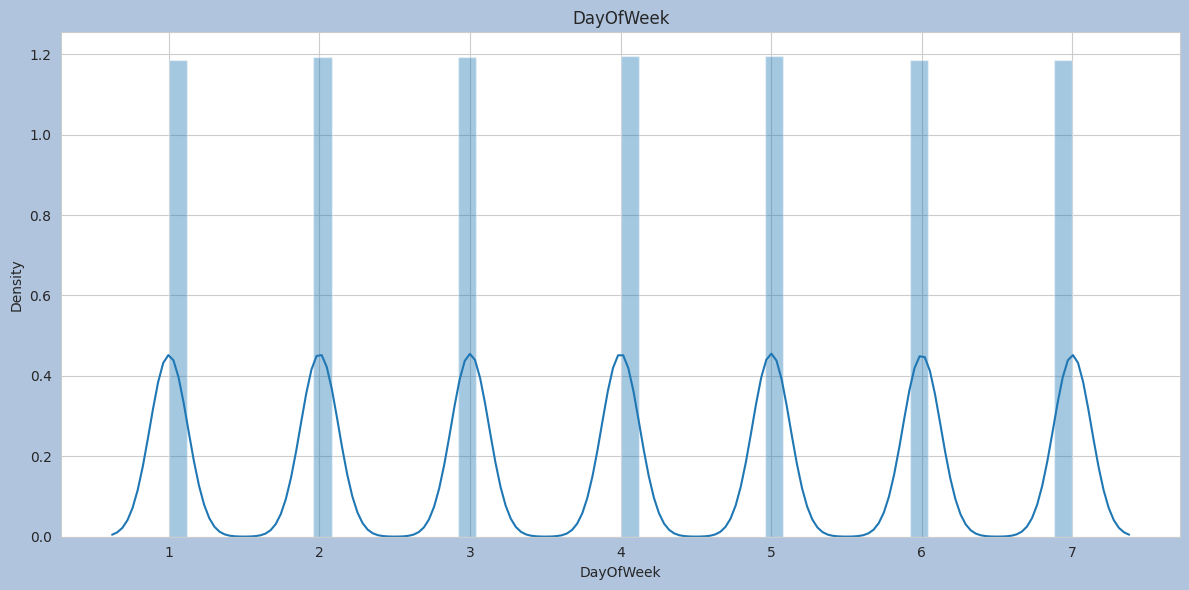

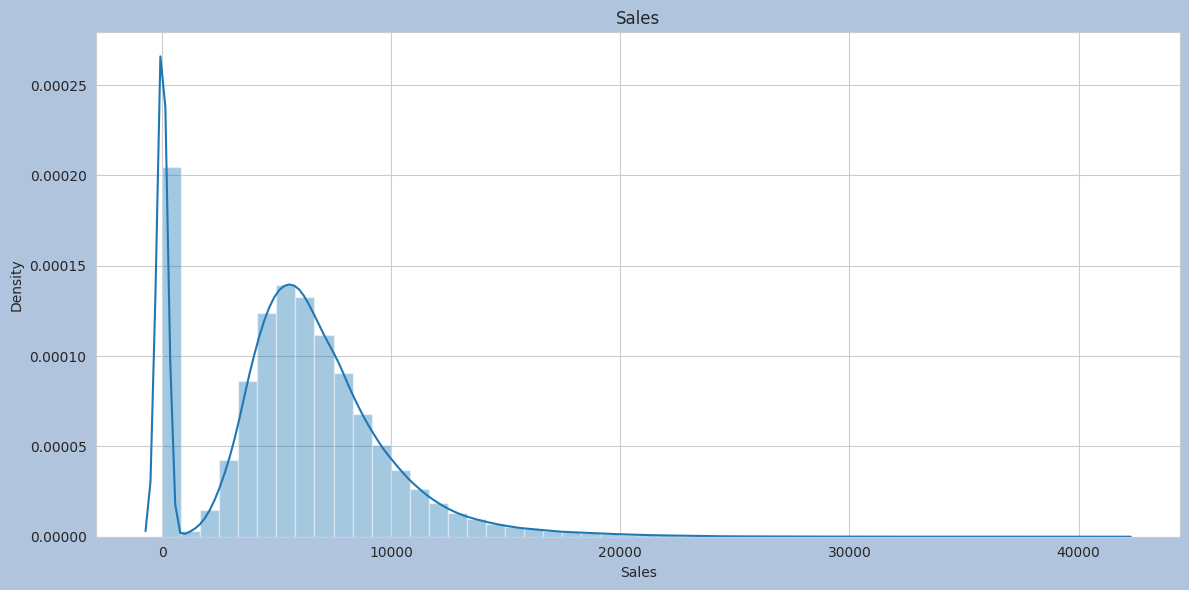

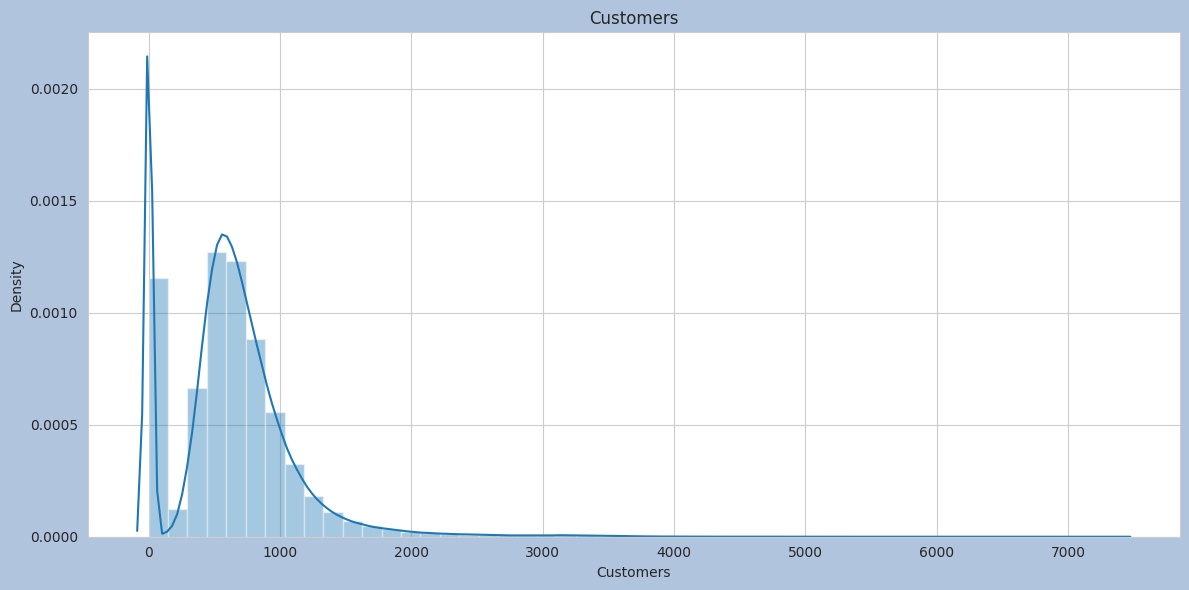

In [447]:
# Numeric Features visualization.

numeric_features = ['DayOfWeek','Sales','Customers']

for col in numeric_features:
    fig = plt.figure(figsize=(12, 6), facecolor = 'lightsteelblue')
    plt.rcParams["figure.autolayout"] = True
    ax = fig.gca()
    feature = rossmannstore_df[col]
    sns.distplot(feature,ax = ax)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to analyze the distribution of numeric features that's why i pick displot.

##### 2. What is/are the insight(s) found from the chart?

From the above displot i found insight. The insight is that the data does not in normal distribution.

#### Chart - 12

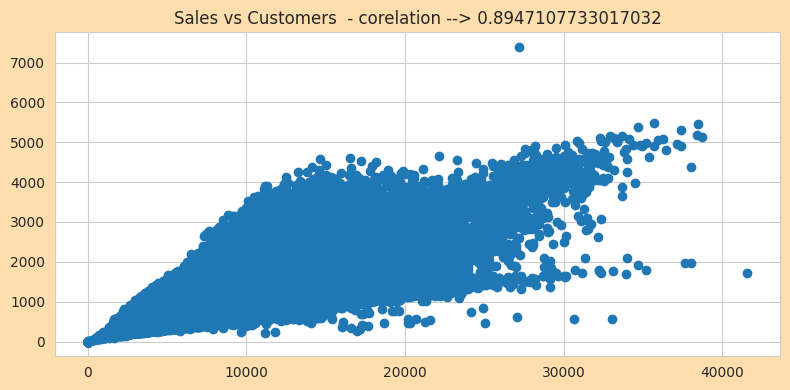

In [448]:
#Corelation Between the Sales and Customers
corelation = list(np.corrcoef(rossmannstore_df['Sales'],rossmannstore_df['Customers']))
plt.figure(figsize= (8,4), facecolor = 'navajowhite')
plt.rcParams["figure.autolayout"] = True
plt.title(f'Sales vs Customers  - corelation --> '+ str(list(corelation[0])[1]))
plt.scatter(rossmannstore_df['Sales'],rossmannstore_df['Customers'])
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to check whether the customers are co-related with sales columns or not that's why i pick the scatter plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart i got the insight that is the customers are highly co-related with sales. The co-relation percentage is 89%.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

now as we know that the customers are highly co-related with sales based on this insight the company can increase the sales accordingly. and this can lead to positive impact on the business.

#### Chart - 13

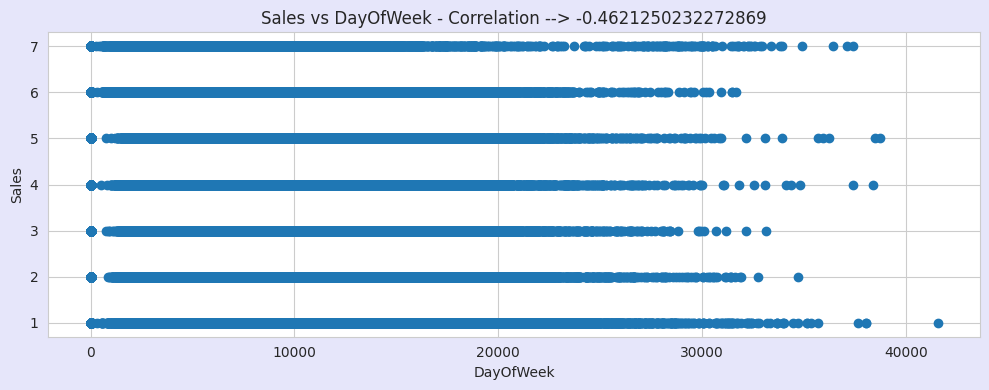

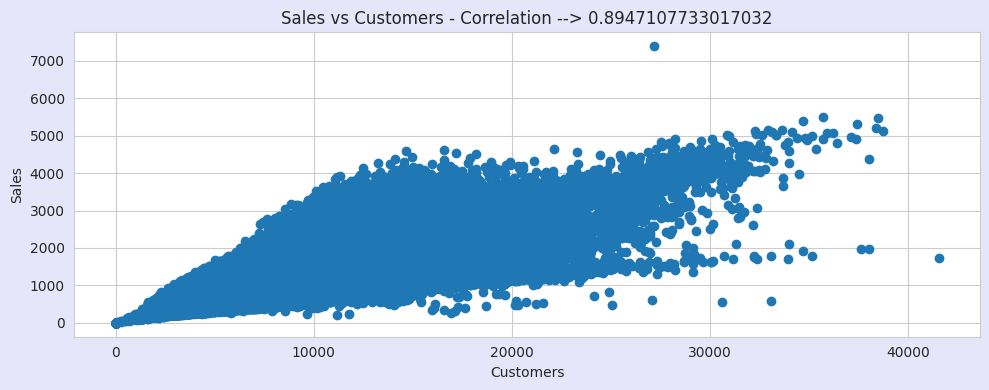

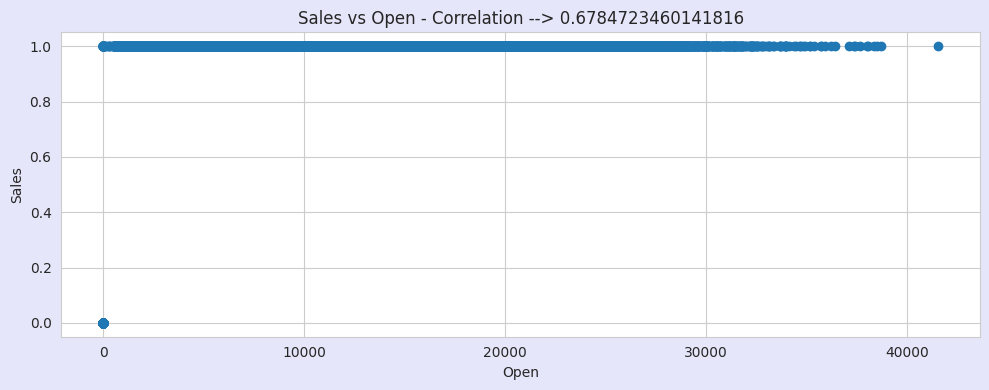

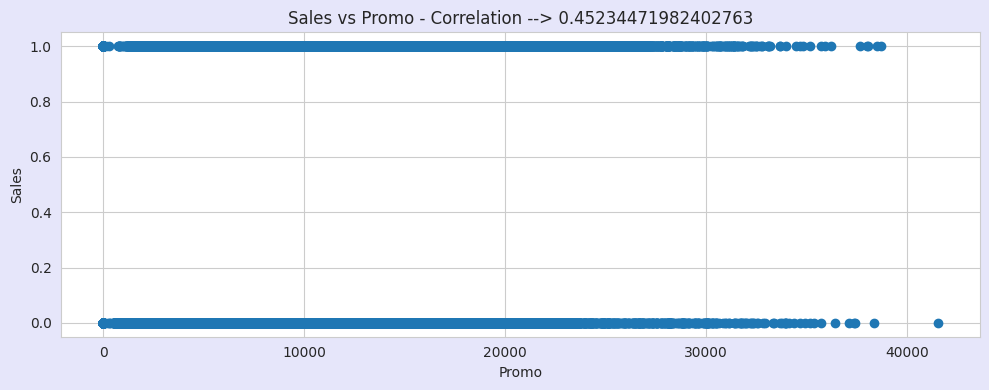

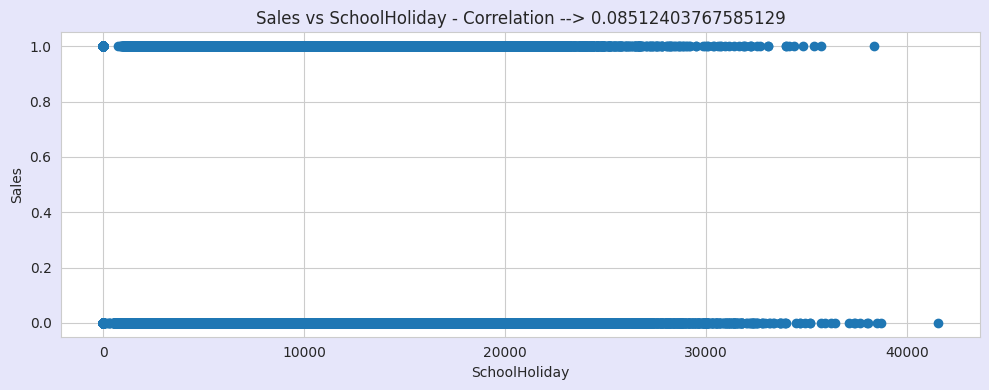

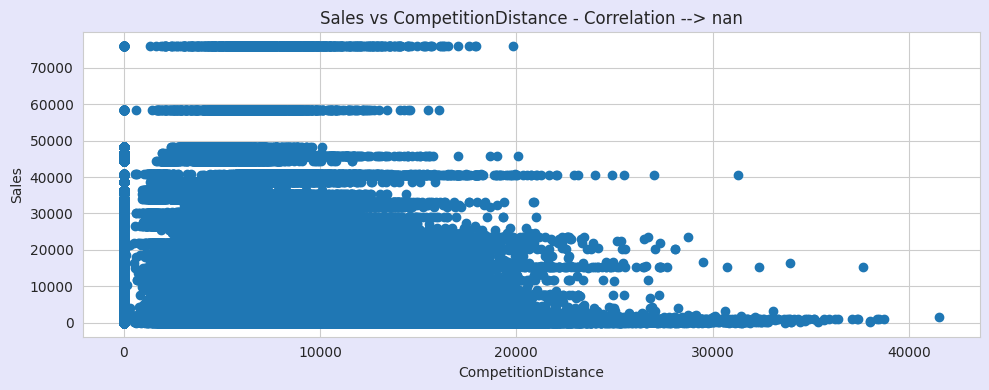

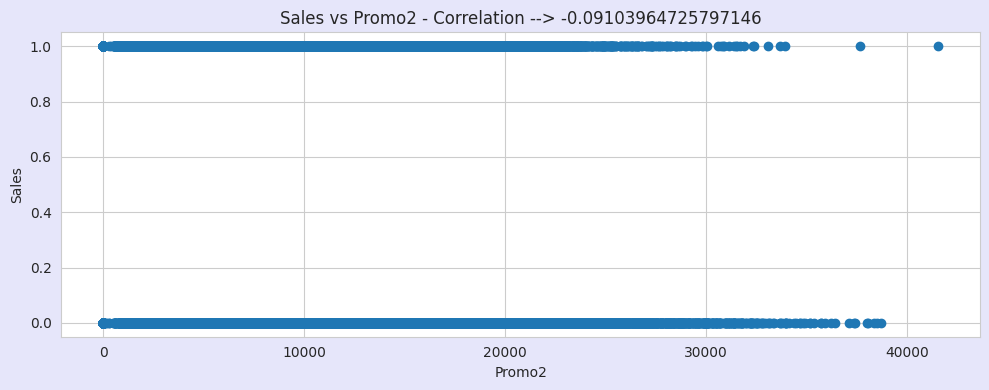

In [449]:
# correlation Between Numeric Features and sales.

numeric_features = list(rossmannstore_df.describe().columns)

for col in ['DayOfWeek','Customers','Open','Promo','SchoolHoliday','CompetitionDistance','Promo2']:
  corelation = np.corrcoef(rossmannstore_df['Sales'], rossmannstore_df[col])
  plt.rcParams["figure.autolayout"] = True
  plt.figure( figsize = (10,4),facecolor = 'lavender')
  plt.title(f'Sales vs {col} - Correlation --> {list(corelation[0])[1]}')
  plt.xlabel(col)
  plt.ylabel('Sales')
  plt.scatter(rossmannstore_df['Sales'], rossmannstore_df[col])
plt.show()



##### 1. Why did you pick the specific chart?

I wanted to see the correlation between numeric features and Sales that's why use scatter plot.

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot i get to know that how the numeric features are correlated to sales column.

#### Chart - 14 - Correlation Heatmap

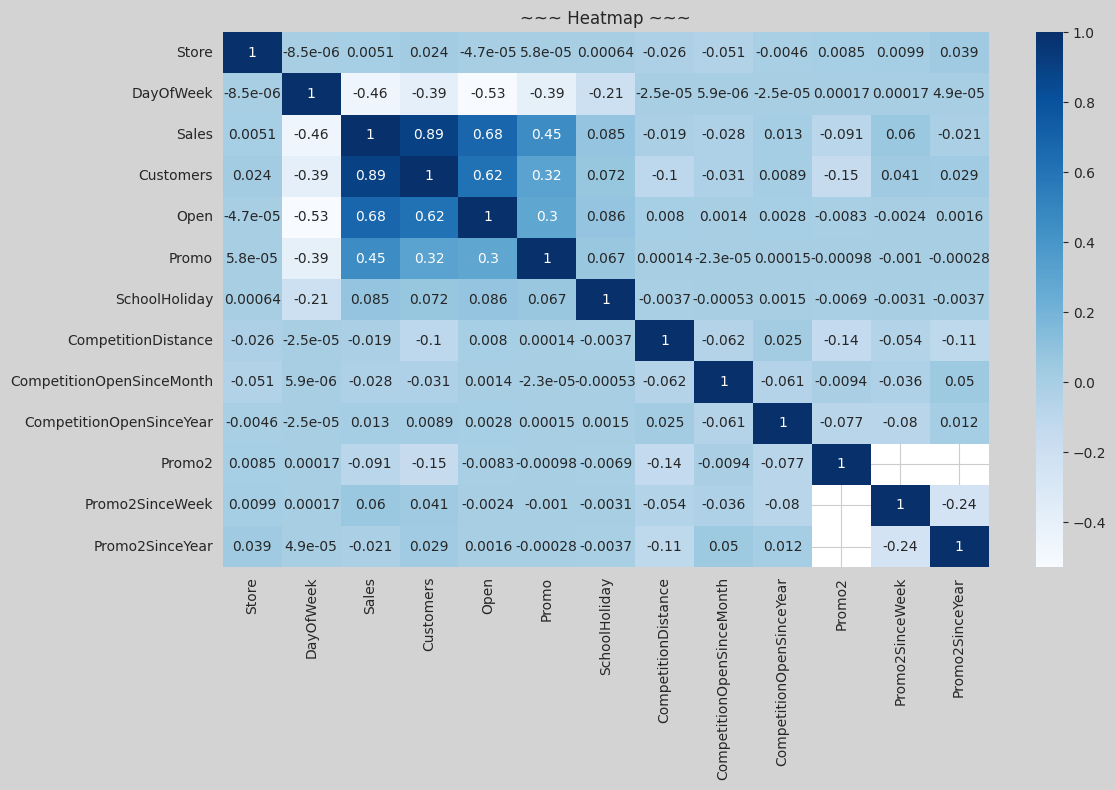

In [450]:
# Correlation Heatmap visualization code
#ploting the heatmap for each and every variable corelation with each other.

corelation = rossmannstore_df.corr()
plt.rcParams['figure.autolayout'] = True
plt.figure(figsize = (12,8), facecolor = 'lightgray')
plt.title('~~~ Heatmap ~~~')
sns.heatmap(corelation, annot = True, cmap= 'Blues')
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to see the correlation of each variable with each other that's why i have picked the heatmap.

##### 2. What is/are the insight(s) found from the chart?

from the above heat map i got to know that all the variable correaltion between each other.

#### Chart - 15 - Pair Plot

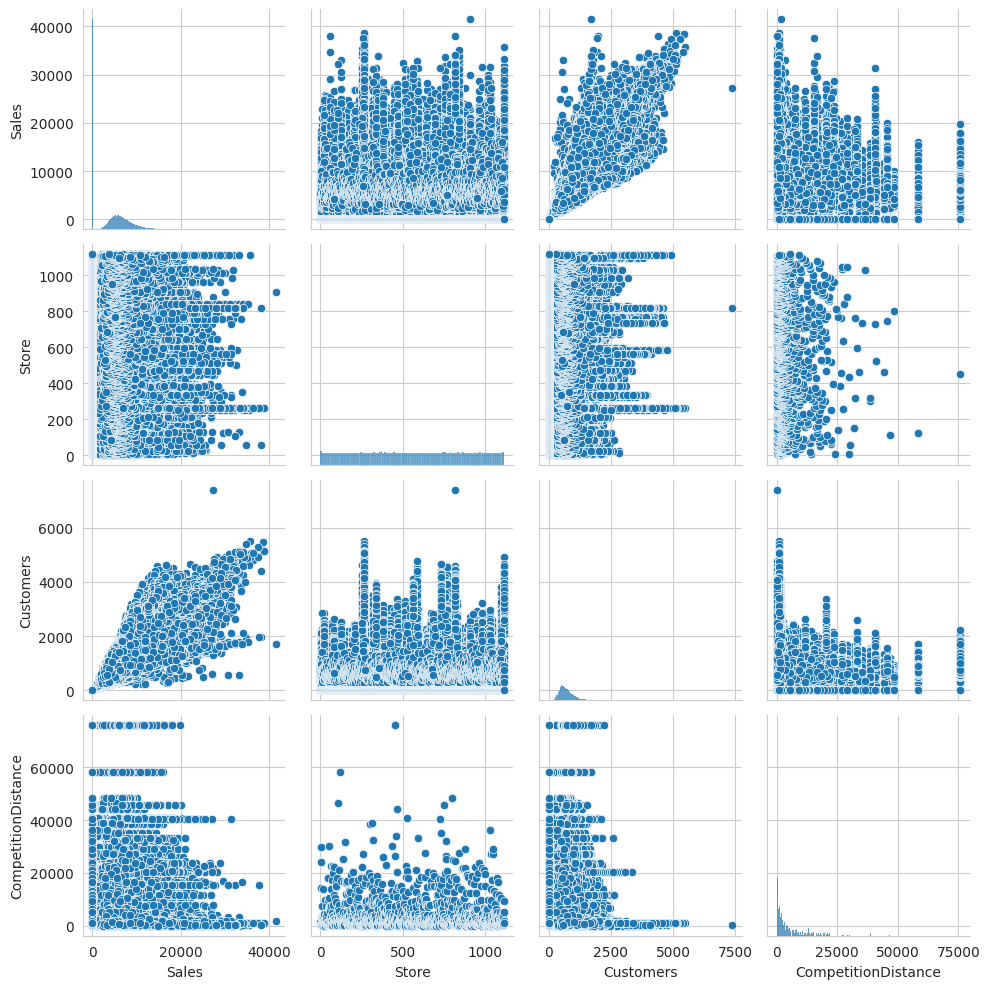

In [451]:
# Pair Plot visualization code

Plot=rossmannstore_df[['Sales','Store', 'Customers','CompetitionDistance']]
plt.rcParams['figure.autolayout'] = True
# plt.figure(figsize = (12,6))
sns.pairplot(Plot)
plt.plot()
plt.show()


##### 1. Why did you pick the specific chart?

I wanted to see the pairwise relationships between variables within a dataset that's why i used pairplot.

##### 2. What is/are the insight(s) found from the chart?

from the above pairplot i got the pairwise relationship between variables.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Performing the T-test one sampled on Sales column for getting to know whether the sales average differs statistically from an actual or apposed Sales mean.A parametric testing technique is the One Sample t-test.

#### 2. Perform an appropriate statistical test.

In [452]:
# Perform Statistical Test to obtain P-Value

sales = rossmannstore_df['Sales']

#calculating the mean of Sales
mean = np.mean(sales)
print(f'mean :{round(mean)}')

# Performing the T-test
t_test,p_val = ttest_1samp(sales,5767)
print("P-value is - ","%.2f"%p_val)

if p_val < 0.05:
  print('We can reject the null Hypothesis')

else:
  print('We can Accept the null Hypothesis')

mean :5774
P-value is -  0.07
We can Accept the null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done the one Sample T-test statistical test to obtain the P-value. and i consider the mean as a 5767 but the actual mean is 5774. And that's why the p value is 0.07. and it's above 0.05 so we can accept this null Hypothesis.

##### Why did you choose the specific statistical test?

I wanted to know whether the sales average differs statistically from an actual or apposed Sales mean. and there is only one variable which is sales that's why i used the T-test one sample.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Performing the Independent T-Test on two indipendent varibles or samples to ascertain if there exists any statistical confirmation that the related population means are statistically substantially distinct.

#### 2. Perform an appropriate statistical test.

In [453]:
# Perform Statistical Test to obtain P-Value


#Creating the data groups
customers = rossmannstore_df['Customers']
Sales = rossmannstore_df['Sales']

#calculating the means of above two data groups
mean1 = np.mean(customers)
mean2 = np.mean(Sales)

#printing the mean values
print("Customer mean value:", round(mean1))
print("Sales mean value:", round(mean2))

#calculatin standard deviation
std1 =  np.std(customers)
std2 = np.std(Sales)

# Printing standard deviation values
print("Customers std value:", round(std1))
print("Sales std value:", round(std2))

#implementing the T-test
t_test,p_val = ttest_ind(Sales, customers)
print("The P-value is: ", "%.4f"%p_val)

if p_val < 0.05:
  print("we can reject the null Hypothesis")
else:
  print("we can Accept the null Hypothesis")

Customer mean value: 633
Sales mean value: 5774
Customers std value: 464
Sales std value: 3850
The P-value is:  0.0000
we can reject the null Hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done the Independent T-Test  to obtain the P-value

##### Why did you choose the specific statistical test?

Because i wanted To ascertain if there exists any statistical confirmation that the related population means are statistically substantially distinct that's why i used the Independent T-Test.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Performing the paired sample T-Test for getting to know about the substantial difference between two related variables is tested using a univariate test.

#### 2. Perform an appropriate statistical test.

In [454]:
# Perform Statistical Test to obtain P-Value

# Creating the data groups
Sales = rossmannstore_df['Sales']
Customers = rossmannstore_df['Customers']

# performing paired sampled T-test
t_test,p_val = stats.ttest_rel(Sales,Customers)
print("The P-value of the test is: ", "%.4f"%p_val)


# taking the threshold value as 0.05 or 5%
if p_val < 0.05:
    print("We can reject the null hypothesis")
else:
    print("We can accept the null hypothesis")

The P-value of the test is:  0.0000
We can reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?


I have done the paired sampled test to obtained the P-Value.

##### Why did you choose the specific statistical test?

I wanted to know about the substantial difference between two related variables is tested using a univariate test. That's why i used this specific statistical test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [455]:
# Handling Missing Values & Missing Value Imputation
rossmannstore_df.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
date                              0
dtype: int64

In [456]:
# Filling Missing Values using fillna method
rossmannstore_df['CompetitionDistance'] =  rossmannstore_df['CompetitionDistance'].fillna(rossmannstore_df['CompetitionDistance'].median())
rossmannstore_df['CompetitionOpenSinceMonth'] = rossmannstore_df['CompetitionOpenSinceMonth'].fillna(rossmannstore_df['CompetitionOpenSinceMonth'].mode()[0])
rossmannstore_df['CompetitionOpenSinceYear'] = rossmannstore_df['CompetitionOpenSinceYear'].fillna(rossmannstore_df['CompetitionOpenSinceYear'].mode()[0])
rossmannstore_df['Promo2SinceWeek'] = rossmannstore_df['Promo2SinceWeek'].fillna(float(0))
rossmannstore_df['Promo2SinceYear'] = rossmannstore_df['Promo2SinceYear'].fillna(float(0))
rossmannstore_df['PromoInterval'] = rossmannstore_df['PromoInterval'].fillna('none')

In [457]:
# checking whether the missing values successfully filled or not.
rossmannstore_df.isnull().sum()

Store                        0
DayOfWeek                    0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
year                         0
month                        0
date                         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used Median,Mode and 0 and 'none' like this techniques while filling the missing value imputation. I have used that techniques because they are well suited for respective datatype. i have filled the NAN with there respective data types of columns. so there will be no any error we have to face when we will do the further analysis on the dataset.


-Hence we successfully dealed with null values and now we are ready for further process

In [458]:
# checking whether the dataset contains duplicate values or not.
rossmannstore_df.duplicated().sum()

0

**-Checking for duplicated items present in our dataset and we see that there are no any duplicates**

In [459]:
#To review the rows and columns of dataset
rossmannstore_df.shape

(1017209, 20)

In [460]:
# printing the top 5 rows of dataset
rossmannstore_df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,date
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,none,2015,07,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,07,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,07,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,none,2015,07,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,none,2015,07,31


### 2. Handling Outliers


 **-Start with our target variable as it is the most important variable.**

**-This Data set have some genuine values which seems as outliers. so we will be working on only those values which is very important to remove and removal of those will does not affect our data set.**

**-Further we will need to perform operation to check if their are any outliers and will need to remove them.**

In [461]:
#To check the no of zeros in sales column
(rossmannstore_df['Sales']==0).sum()


172871

**-Improving Target Varible(Sales) by removing all the zeros.**

In [462]:
# storing the non zero values in sales column
rossmannstore_df = rossmannstore_df[rossmannstore_df.Sales != 0]

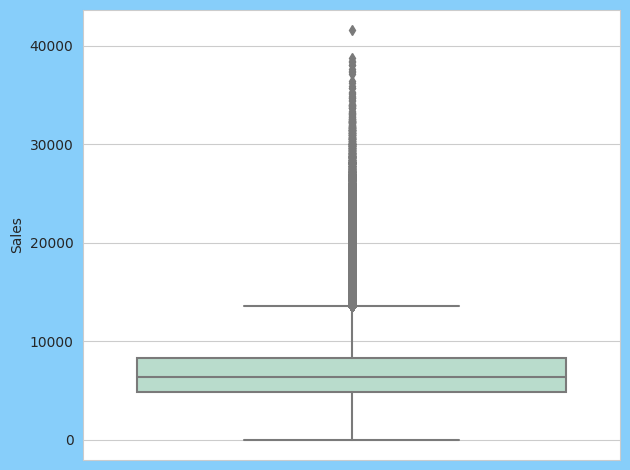

In [463]:
# ploting the boxplot for checking whether there is outliers or not in our target variable
sns.set_style('whitegrid')
plt.figure(facecolor = 'lightskyblue')
plt.rcParams['figure.autolayout'] = True
sns.boxplot(y=rossmannstore_df['Sales'], palette='Pastel2');
plt.show()

From the above boxplot we get to know that there is outliers present in our target variable. so we have to remove it.

In [464]:
#calculating the upper and lower bound outliers so we can remove it further.
percentile_25 = np.percentile(rossmannstore_df['Sales'],25)
percentile_75 = np.percentile(rossmannstore_df['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr

In [465]:
#Removing the outliers from the target ('Sales') variable.
rossmannstore_df.drop(index=rossmannstore_df[rossmannstore_df['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
rossmannstore_df.drop(index=rossmannstore_df[rossmannstore_df['Sales']<lower_outlier_bound].index,axis=0,inplace=True)


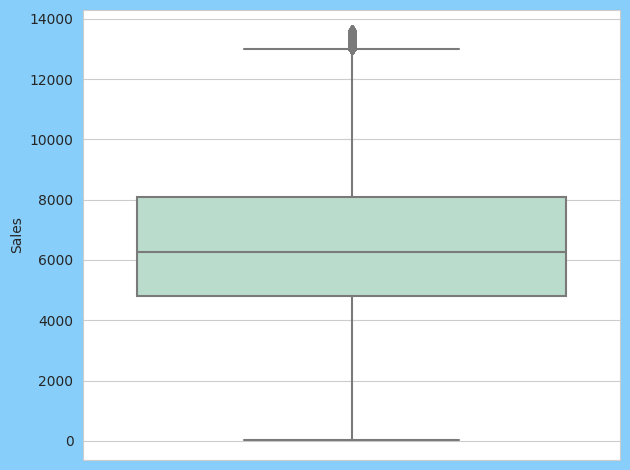

In [466]:
#ploting boxplot of target variable for confirming whether the outliers is successfuly removed or not.
sns.set_style('whitegrid')
plt.figure(facecolor = 'lightskyblue')
plt.rcParams['figure.autolayout'] = True
sns.boxplot(y=rossmannstore_df['Sales'], palette='Pastel2');
plt.show()

From the above boxplot we can say that we have succefully removed outliers from the target variable.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have used boxplot for visualization of outliers. and whatever the value more that 75% and less than 25%  then i have removed it by considering as a outliers.

### 3. Categorical Encoding

In [467]:
# StateHoliday column Before Categorical Encoding
rossmannstore_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [468]:

# Categorical Encoding for StateHoliday Column.
rossmannstore_df['StateHoliday'] = np.where((rossmannstore_df['StateHoliday'] == '0'),0,rossmannstore_df['StateHoliday'])
rossmannstore_df['StateHoliday'] = np.where((rossmannstore_df['StateHoliday'] == 'a'),1,rossmannstore_df['StateHoliday'])
rossmannstore_df['StateHoliday'] = np.where((rossmannstore_df['StateHoliday'] == 'b'),2,rossmannstore_df['StateHoliday'])
rossmannstore_df['StateHoliday'] = np.where((rossmannstore_df['StateHoliday'] == 'c'),3,rossmannstore_df['StateHoliday'])

In [469]:
#checking whether all the categorical values converted into integers or not.
rossmannstore_df['StateHoliday'].unique()

array([0, 1, 2, 3], dtype=object)

Above you can see that i have successfully converted categorical values to integer.

before if was ['0','a','b','c'] now  it is [0,1,2,3]

This categorical Encoding will be helpfull for further data processing.

In [470]:
# StoreType column values before Categorical Encoding
rossmannstore_df['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [471]:
#Categorical Encoding for StoreType column
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'a'),0,rossmannstore_df['StoreType'])
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'b'),1,rossmannstore_df['StoreType'])
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'c'),2,rossmannstore_df['StoreType'])
rossmannstore_df['StoreType'] = np.where((rossmannstore_df['StoreType'] == 'd'),3,rossmannstore_df['StoreType'])

In [472]:
# StoreType column values After categorical Encoding
rossmannstore_df['StoreType'].unique()

array([2, 0, 3, 1], dtype=object)

Above we have done the categorical encoding for store type column and successfully converted all the cateforical values in integers. before it was ['a','b','c','d'] and now it is [0,1,2,3]

In [473]:
# Assortment Column values before categorical Encoding
rossmannstore_df['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [474]:
#Categorical Encoding for Assortment Column
rossmannstore_df['Assortment'] = np.where((rossmannstore_df['Assortment']== 'a'),0, rossmannstore_df['Assortment'])
rossmannstore_df['Assortment'] = np.where((rossmannstore_df['Assortment'] == 'b'),1,rossmannstore_df['Assortment'])
rossmannstore_df['Assortment'] = np.where((rossmannstore_df['Assortment'] == 'c'),2,rossmannstore_df['Assortment'])


In [475]:
#Assortment Column values after Categorical Encoding
rossmannstore_df['Assortment'].unique()

array([0, 2, 1], dtype=object)

Above we have done the categorical encoding for Assortment column and successfully converted all the cateforical values in integers. before it was ['a','b','c'] and now it is [0,1,2]

In [476]:
# converting all the categorical variable into integer
rossmannstore_df['StateHoliday'] = rossmannstore_df['StateHoliday'].astype(int)
rossmannstore_df['StoreType'] = rossmannstore_df['StoreType'].astype(int)
rossmannstore_df['Assortment'] = rossmannstore_df['Assortment'].astype(int)
rossmannstore_df['year'] = rossmannstore_df['year'].astype(int)
rossmannstore_df['month'] = rossmannstore_df['month'].astype(int)
rossmannstore_df['date'] = rossmannstore_df['date'].astype(int)

In [477]:
#confirming whether the datatype of variables are converted or not.
rossmannstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813569 entries, 0 to 1017190
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      813569 non-null  int64  
 1   DayOfWeek                  813569 non-null  int64  
 2   Sales                      813569 non-null  int64  
 3   Customers                  813569 non-null  int64  
 4   Open                       813569 non-null  int64  
 5   Promo                      813569 non-null  int64  
 6   StateHoliday               813569 non-null  int64  
 7   SchoolHoliday              813569 non-null  int64  
 8   StoreType                  813569 non-null  int64  
 9   Assortment                 813569 non-null  int64  
 10  CompetitionDistance        813569 non-null  float64
 11  CompetitionOpenSinceMonth  813569 non-null  float64
 12  CompetitionOpenSinceYear   813569 non-null  float64
 13  Promo2                     8

Above we have converted all the categorical variable into integer.

#### What all categorical encoding techniques have you used & why did you use those techniques?

To deal with categorical values we have use One Hot Encoding technique to convert them into numerical

In StoreType column we have replace categorical values with numerical

We had features having object data type so convert them as integer data type

In the categorical Encoding i have done the encoding on the StateHoliday, StoreType and Assortment. I have successfully converted all the categorical values into integer using cagtegorical encoding techniques. and after that changed the object datatype of columns into integer datatype.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [478]:
# Defining Function for calculating the VIF
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [479]:
# Calculating VIF for measuring the amount of multicolinearity.
calc_vif(rossmannstore_df[[i for i in rossmannstore_df.describe().columns if i not in ['Store','Sales','Open',]]])

,variables,VIF
0,DayOfWeek,5.847146e+00
1,Customers,7.588161e+00
2,Promo,2.017880e+00
3,StateHoliday,1.002465e+00
4,SchoolHoliday,1.283491e+00
5,StoreType,1.998610e+00
6,Assortment,2.057719e+00
7,CompetitionDistance,1.633957e+00
8,CompetitionOpenSinceMonth,8.998670e+00
9,CompetitionOpenSinceYear,1.406829e+05


From the above all the VIF is under range 10. So there is no sign of multicolinearity. so we can proceed further with these all features.

#### 2. Feature Selection

In [506]:
# Select your features wisely to avoid overfitting

# Defining Dependent Variable
dep_var = 'Sales'
indep_var = rossmannstore_df.columns.drop(['Store','Sales','Open','PromoInterval'])

In [507]:
# creating the data for dependent variable
x = rossmannstore_df[indep_var].values

# creating the data for independent variable
y = rossmannstore_df[dep_var].values

##### What all feature selection methods have you used  and why?

Based on the VIF i have selected the features. I have selected Sales as Dependent variable. and in the independent variables all the columns are there except  store, sales and open.

##### Which all features you found important and why?

I found that all the listed features are important because they have multicolinearity.

features:

'DayOfWeek', 'Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'year', 'month',
       'date'

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [508]:
# Transform Your data
#getting the numeric features list
num_features = list(rossmannstore_df.describe().columns)
num_features

['Store',
 'DayOfWeek',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'year',
 'month',
 'date']

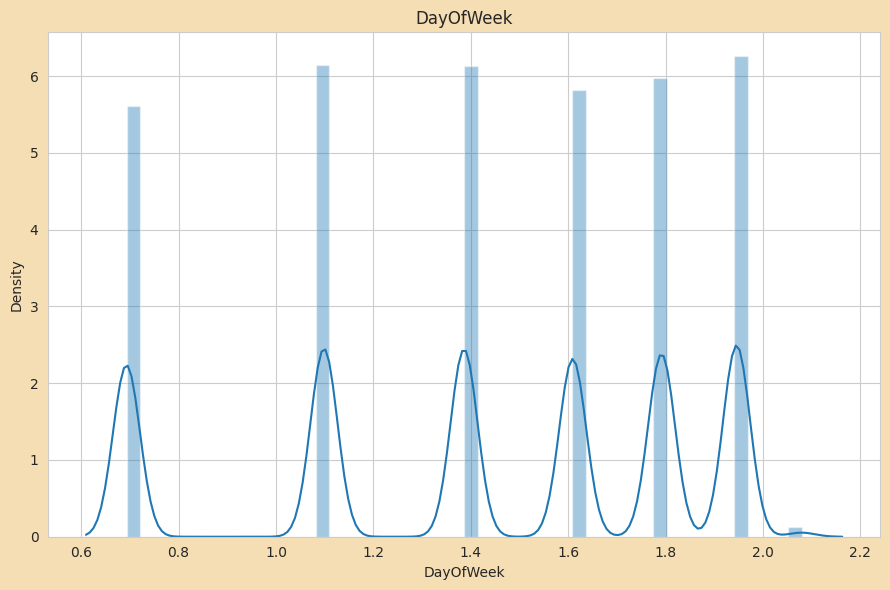

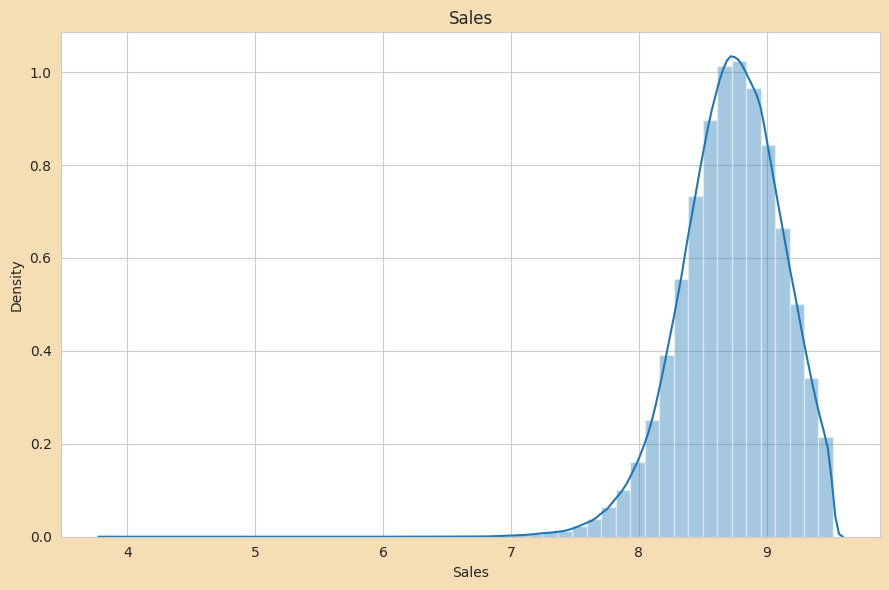

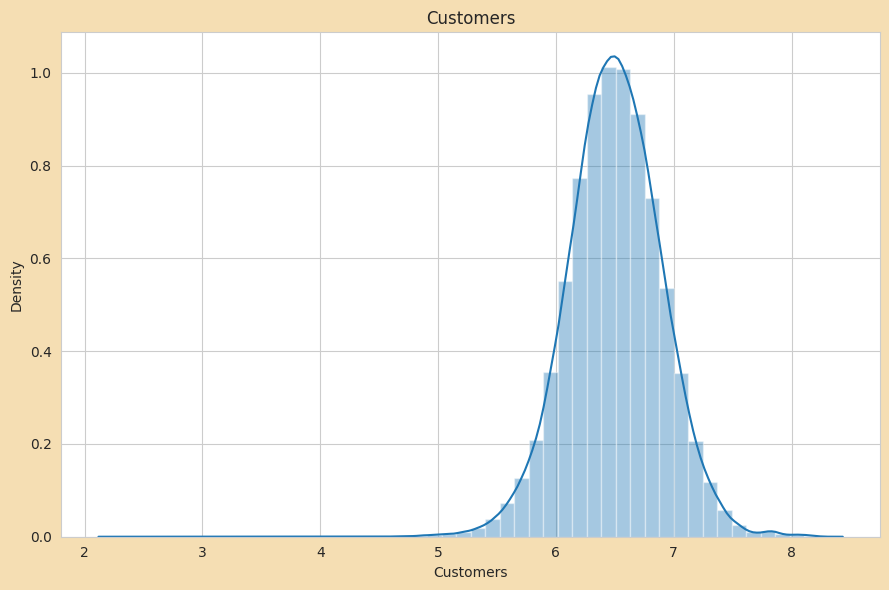

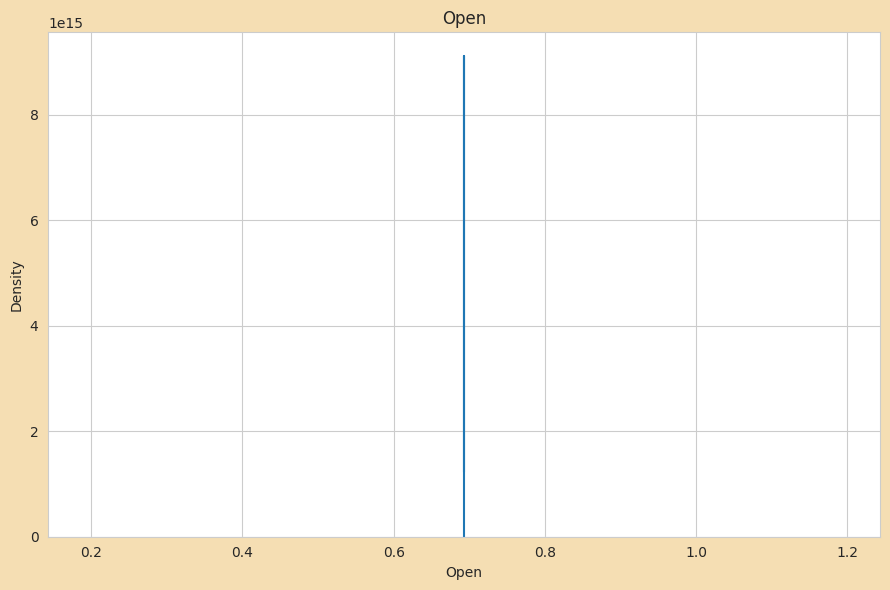

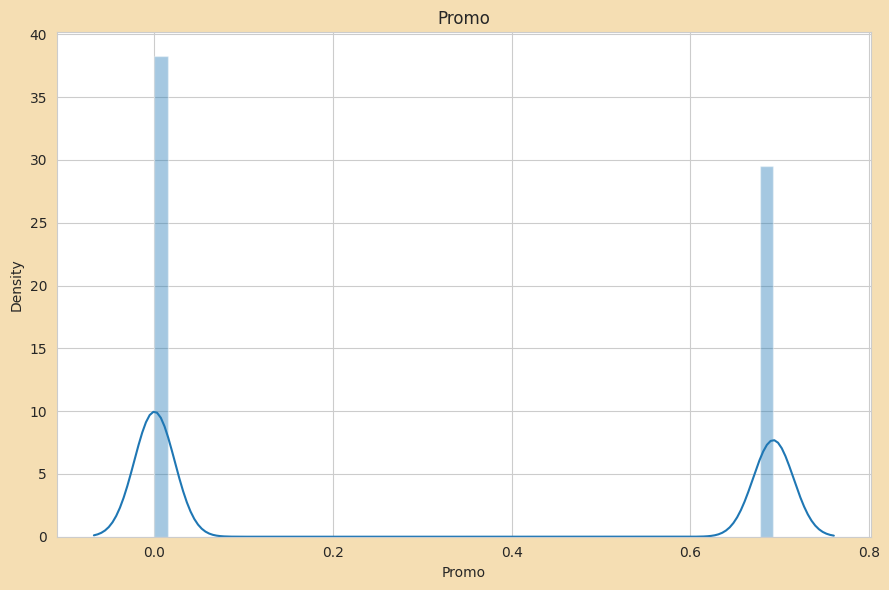

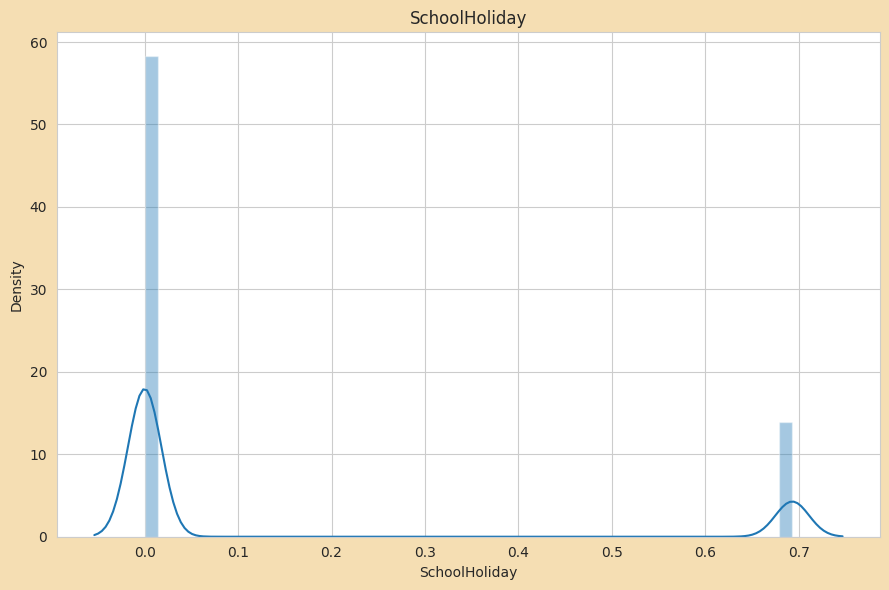

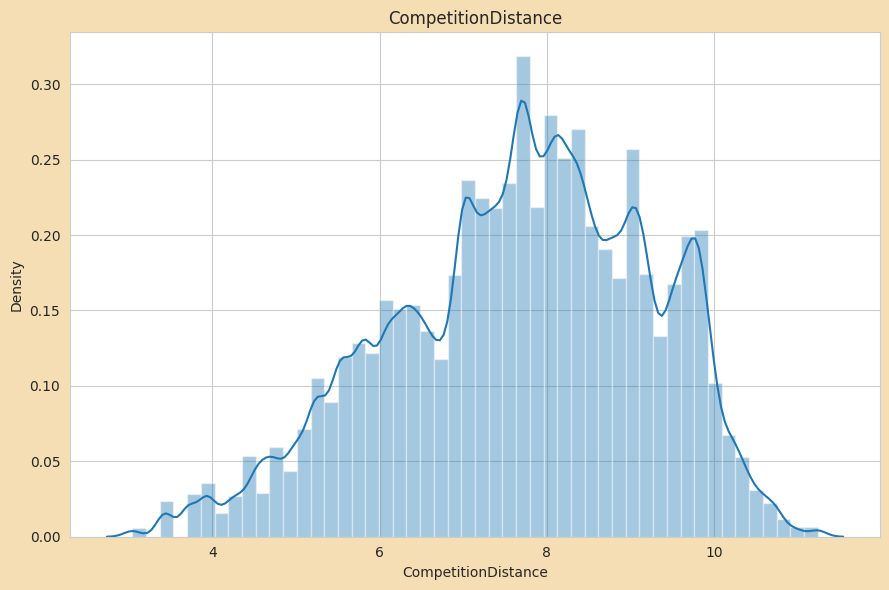

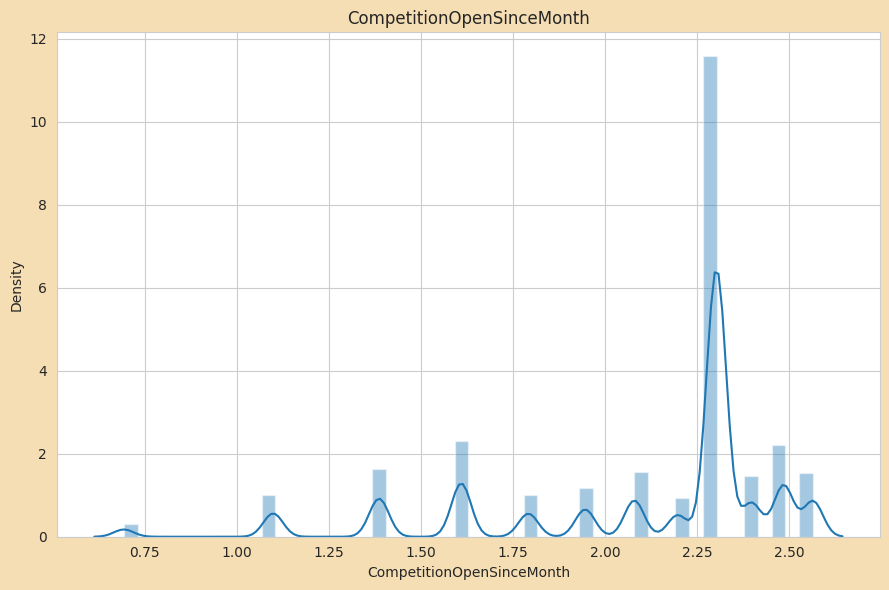

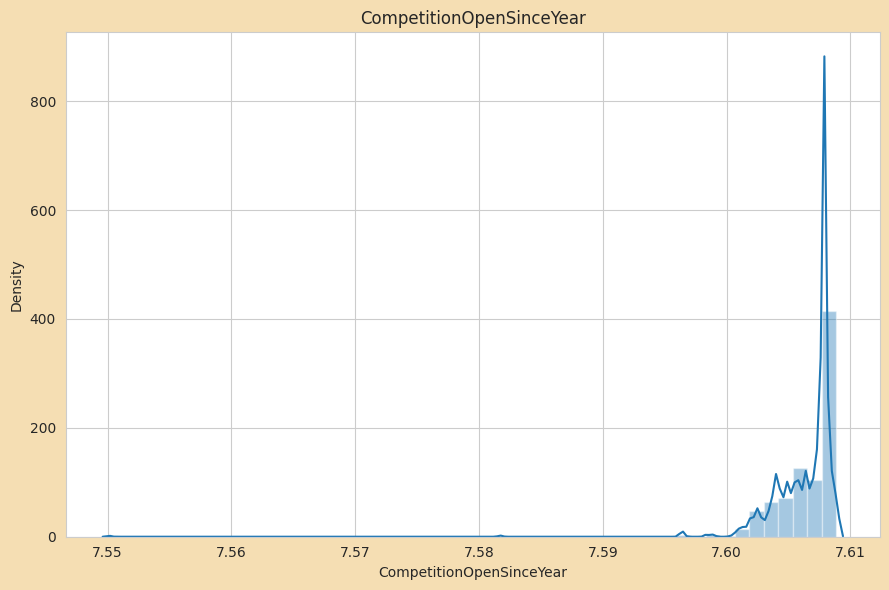

In [509]:
#printing displots to analyze the distribution of all numerical features
for col in numeric_features[1:-3]:
    fig = plt.figure(figsize=(9, 6), facecolor = 'wheat')
    ax = fig.gca()
    feature = np.log1p(rossmannstore_df[col])
    sns.distplot(feature)
    ax.set_title(col)

plt.show()

Above we have done Log1p Transformation on the all numeric features within the dataset.

### 6. Data Splitting

In [510]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Splitting the dataset into the Training set and Test set

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 1)
print(x_train.shape)
print(x_test.shape)

(650855, 16)
(162714, 16)


In [512]:
# Scalling the x_train, x_test data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Spliting of data means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

So we have spilting the data into 80:20 proportion

## ***7. ML Model Implementation***

In [514]:
# Defining the print_evaluate function for printing the metrics of ml model
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

using the above print_evaluate function we will print the MAE, MSE, RMSE and r2_square of the machine learning model to monitor and measure the performance of a model (during training and testing).

### ML Model - 1

In [519]:
# ML Model - 1 Implementation
# Fit the Algorithm
reg = LinearRegression()
reg.fit(x_train,y_train)
# Predict on the model
reg.predict(x_test)

array([8663.14014041, 2699.06375905, 3417.48355658, ..., 8328.71983351,
       6237.99522567, 5461.34515986])

In [525]:
# Defining the test_pred and train_pred variable for storing the prediction values of both the training and testing dataset
test_pred = reg.predict(x_test)
train_pred = reg.predict(x_train)

In [529]:
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train,train_pred)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test,test_pred)

Train set evaluation:
_____________________________________
MAE: 954.7472402689981
MSE: 1716372.3366605018
RMSE: 1310.103941166693
R2 Square 0.7072314397773657
__________________________________
Test set evaluation:
_____________________________________
MAE: 951.7479214706182
MSE: 1701023.558205044
RMSE: 1304.2329386290794
R2 Square 0.7095344262394767
__________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

We have apply Linear Regression model and got the value of r2 is 0.70

So from the above evaluation we can conclude that our model is not performing well on this dataset.

In [547]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

In [550]:
#  Implementing the model
DT_model = DecisionTreeRegressor()

# Training the model
DT_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [551]:
# defining the two variables for storing both test and train prediction value.
test_pred = DT_model.predict(x_test)
train_pred = DT_model.predict(x_train)

In [552]:
# test model on train data set
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Train set evaluation:
_____________________________________
MAE: 0.0070584077866805974
MSE: 2.956274439007152
RMSE: 1.719381993335731
R2 Square 0.9999994957363314
__________________________________


In [553]:
# test model test data set
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test,test_pred)

Test set evaluation:
_____________________________________
MAE: 426.00438499453026
MSE: 359320.4772929803
RMSE: 599.433463607914
R2 Square 0.9386426906921005
__________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

we have apply decision Tree regression model and got the value of r2 is 0.93.

so from the above evaluation we can conclude that the decision tree regression model is performing well on this dataset.

In [ ]:
# Visualizing evaluation Metric Score chart


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***